In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Define the function for generating polynomial features
def poly_features(X, degree):
    n_samples = X.shape[0]
    X_poly = np.zeros((n_samples, degree))
    for i in range(degree):
        X_poly[:, i] = X[:, 0]**(i+1)
    return X_poly

# Define the function for scaling the features
def scale_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    #print(mean,std)
    X_scaled = (X - mean) / std
    return X_scaled

# Define the function for performing polynomial ridge regression
def poly_ridge_regression(X, y, degree, alpha):
    X_scaled = scale_features(X)
    X_poly = poly_features(X_scaled, degree)
    
    #print(X_poly)
    identity_matrix = np.identity(degree)
    w = (np.linalg.inv(X_poly.T @ X_poly + alpha * identity_matrix) @ X_poly.T @ y)
    #print(w)
    return w

# Define the function for making predictions
def predict(X, w, degree):
    X_scaled = scale_features(X)
    X_poly = poly_features(X_scaled, degree)
    y_pred = X_poly @ w
    return y_pred

# Define the function for performing cross-validation
def cross_validate(X, y, degree, alpha, k):
    n_samples = X.shape[0]
    indices = np.random.permutation(n_samples)
    fold_size = int(n_samples / k)
    scores = []
    for i in range(k):
        start, end = i*fold_size, (i+1)*fold_size
        test_indices = indices[start:end]
        train_indices = np.concatenate((indices[:start], indices[end:]))
        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]
        w = poly_ridge_regression(X_train, y_train, degree, alpha)
        y_pred = predict(X_test, w, degree)
        print(y_pred,y)
        score = np.mean((y_test - y_pred)**2)
        scores.append(score)
    return scores



In [ ]:
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b

In [685]:
degree = 12
s = StandardScaler()
poly = PolynomialFeatures(degree, include_bias=True)
alpha = math.exp(0.35)

In [686]:
train = pd.DataFrame(np.genfromtxt('train.dat',
                     dtype=None,
                     delimiter=' ')).sort_values(["f0"])
test = pd.DataFrame(np.genfromtxt('test.dat',
                     dtype=None)).sort_values(["f0"])

In [687]:
X_train = np.array(train.f0).reshape(-1,1)
y_train = np.array(train.f1)
X_scaled = s.fit_transform(X_train)
X_scaled_poly = poly.fit_transform(X_scaled)

In [688]:
X_t = np.array(test.f0).reshape(-1,1)
y_t = np.array(test.f1)
X_test_s = s.fit_transform(X_t)
X_test_s_pol = poly.fit_transform(X_test_s)

In [689]:
from sklearn.linear_model import Ridge

In [690]:
from sklearn.linear_model import LinearRegression
model = Ridge(alpha = alpha)

In [691]:
c = model.fit(X_scaled_poly,y_train)

In [692]:
c.score(X_scaled_poly,y_train)

0.941710836657038

In [693]:
y_pred = c.predict(X_test_s_pol)

In [694]:
print("RMSE:",math.sqrt((np.square(y_t-y_pred).mean())))

RMSE: 0.7569625569717664


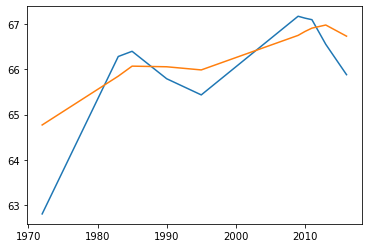

In [695]:
plt.plot(X_t,y_t)
plt.plot(X_t,y_pred)

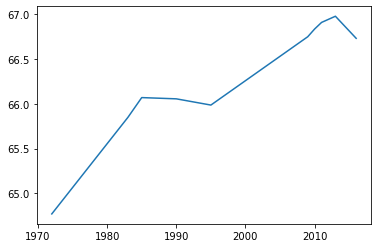

In [696]:
plt.plot(X_t,y_pred)

In [624]:
degree

2

In [625]:
import math
MSE = np.square(np.subtract(y_t,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)

In [626]:
RMSE

0.7192392487098687